In [1]:
from sklearn.decomposition import PCA

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
iris = load_iris()

C:\Users\Administrator\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
x = iris.data
y = iris.target

In [7]:
pca = PCA(n_components=2)
x_de = pca.fit_transform(x)

In [10]:
import numpy as np
np.unique(y)

array([0, 1, 2])

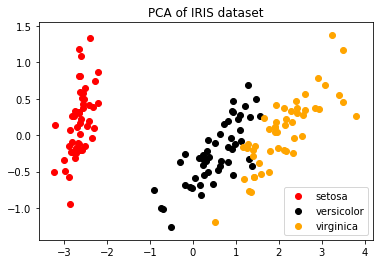

In [15]:
plt.figure()
colors = ['red', 'black', 'orange']
for i in range(0, 3):
    plt.scatter(x_de[y==i, 0], x_de[y==i, 1],c=colors[i],label=iris.target_names[i])
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

In [17]:
#每个新特征上信息量大小
pca.explained_variance_

array([4.22824171, 0.24267075])

In [18]:
#每个特征占原特征信息量

In [20]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [21]:
pca.explained_variance_ratio_.sum()

0.977685206318795

In [22]:
pca_line = PCA().fit(x)
pca_line.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [27]:
#n_component默认为min(x.shape),因此我们可以根据其特征重要性解释来选择
#最后我们希望保留多少个特征
pca_line.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [28]:
#对数组进行从前到后累加
np.cumsum(pca_line.explained_variance_ratio_)

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

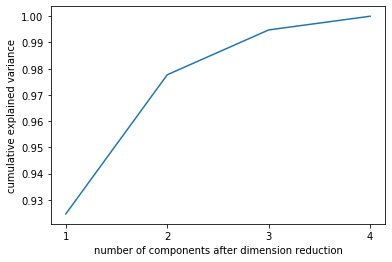

In [29]:
plt.plot(range(1,5), np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1, 2, 3, 4])
plt.xlabel('number of components after dimension reduction')
plt.ylabel('cumulative explained variance')
plt.show()

In [30]:
#采用最大似然估计让PCA自己选择特征个数
pca_mle = PCA(n_components='mle').fit(x)
x_mle = pca_mle.transform(x)

In [31]:
x_mle

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [33]:
#通过信息占比，希望保留的信息数量
pca_f = PCA(n_components=.97, svd_solver='full').fit(x)
x_f = pca_f.transform(x)

In [35]:
pca_f.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [37]:
#查看Vk,n
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [ ]:
PCA().fit(x).

# components应用，低维数据可视化

In [1]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [3]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [5]:
faces.data.shape

(1348, 2914)

In [6]:
import pandas as pd
pd.DataFrame(faces.data).head

<bound method NDFrame.head of             0           1           2           3           4           5     \
0     138.000000  135.666672  127.666664  120.666664  117.000000  119.666664   
1      71.000000   56.333332   67.666664   91.333336   91.666664   71.666664   
2      84.666664   97.333336   72.666664   56.333332   94.666664  118.333336   
3      68.333336   81.666664  121.666664  135.000000  138.666672  141.333328   
4      56.333332   55.333332   47.333332   47.333332   50.333332   44.333332   
...          ...         ...         ...         ...         ...         ...   
1343   45.666668   47.666668   47.000000   59.000000   81.666664  114.000000   
1344   86.333336   83.333336   76.333336   74.666664   88.000000  114.333336   
1345   29.333334   28.666666   29.333334   48.666668   91.000000   96.000000   
1346   49.000000   55.333332   76.333336   89.666664   77.000000   75.333336   
1347   31.000000   26.333334   28.333334   33.666668   43.000000   63.333332   

         

In [8]:
faces.images.shape

(1348, 62, 47)

In [10]:
X = faces.data           

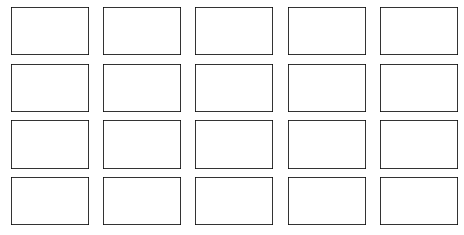

In [15]:
#将像素可视化
#创建子图和画布
fig, axes = plt.subplots(4, 5
                       ,figsize=(8, 4) #画布大小
                       ,subplot_kw = {'xticks':[], 'yticks':[]}#不显示坐标
                       )

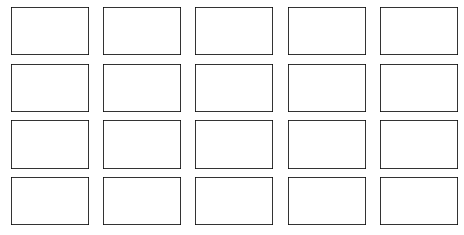

In [16]:
fig

In [17]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017887A3BDD8>,
      dtype=object)

In [18]:
axes[0][0].imshow(faces.images[0, :, :])

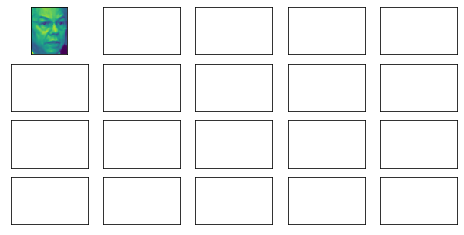

In [19]:
fig

In [20]:
#将axes降维从而来方便填补图片
axes.flat

In [22]:
for i, ax in enumerate(axes.flat):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [23]:
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i, :, :], cmap="gray")#选择色彩模式

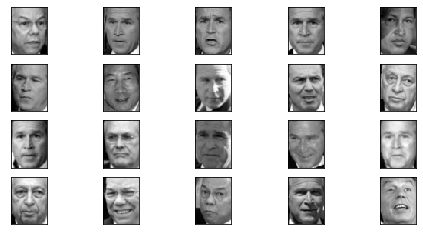

In [24]:
fig

In [25]:
pca = PCA(n_components=150).fit(X)

In [28]:
V = pca.components_

In [29]:
V.shape

(150, 2914)

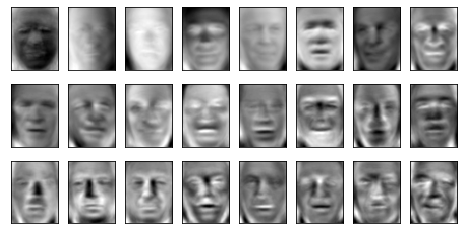

In [31]:
fig, axes = plt.subplots(3, 8
                        , figsize=(8, 4)
                        , subplot_kw = {'xticks':[], 'yticks':[]}
                        )
for i, ax in enumerate(axes.flat):
    ax.imshow(V[i, :].reshape(62, 47), cmap='gray')

In [32]:
x_tr = pca.transform(X)
x_tr.shape

(1348, 150)

## 接口invers_transform 

In [33]:
x_inverse = pca.inverse_transform(x_tr)

In [34]:
x_inverse.shape

(1348, 2914)

In [35]:
for i, ax in enumerate(axes.flat):
    ax.imshow(x_inverse[i, : ].reshape(62, 47), cmap='gray')

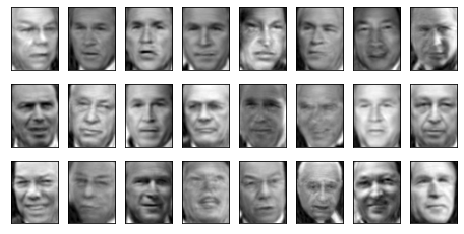

In [36]:
fig

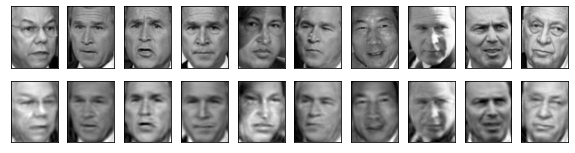

In [39]:
figs, axes = plt.subplots(2, 10
                         , figsize=(10, 2.5)
                         , subplot_kw={'xticks':[], 'yticks':[]})
for i in range(10):
    axes[0][i].imshow(X[i, :].reshape(62, 47), cmap='gray')
    axes[1][i].imshow(x_inverse[i, :].reshape(62, 47), cmap='gray')

In [42]:
pca.explained_variance_ratio_.shape

(150,)

# 使用PCA做噪声过滤
降维后再升维，使得在降维时去掉了与标签联系小的特征，升维之后得到噪声过滤的数据

In [43]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [44]:
digits = load_digits()

In [45]:
digits.data.shape

(1797, 64)

In [52]:
digits.images.shape

(1797, 8, 8)

In [50]:
def plot_fig(data):
    fig, axes = plt.subplots(4, 10
                            , figsize=(10, 4)
                            , subplot_kw = {'xticks':[], 'yticks':[]}
                            )
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary')

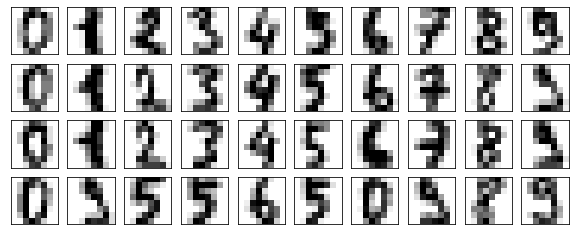

In [51]:
plot_fig(digits.data)

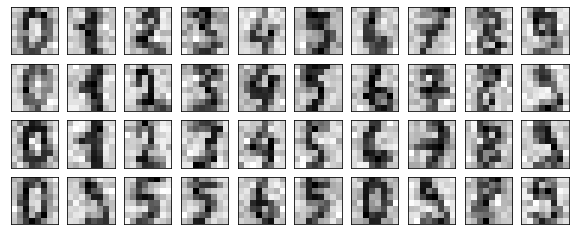

In [54]:
#人为地给手写数据集加上噪声
rng = np.random.RandomState(40)
#从里面数据集中随机抽取满足正态分布的数据集，第二个为方差大小
#方差越大越乱
noisy = rng.normal(digits.data, 2)
plot_fig(noisy)

In [56]:
digits.data - noisy

array([[ 1.21509539,  0.25227283,  1.36921272, ...,  0.16895941,
        -2.58403003,  0.35342114],
       [-3.3755743 ,  2.09322708, -1.28424042, ..., -0.60798667,
        -1.14619363,  2.43717553],
       [ 1.54294179,  0.7050184 , -6.87489789, ...,  2.25229966,
        -3.52203497, -2.00111581],
       ...,
       [-1.13454295, -1.66215237, -0.61572412, ..., -0.11248188,
         1.584176  ,  1.03524098],
       [-0.01249993,  1.59264497,  0.65628907, ...,  0.78835742,
         1.45108736,  1.23705088],
       [ 0.03162481,  3.23110405, -0.25317613, ..., -1.96934051,
        -0.79475903,  2.75914302]])

In [57]:
pca = PCA(.5, svd_solver='full').fit(noisy)
xdr = pca.transform(noisy)

In [58]:
xdr.shape

(1797, 6)

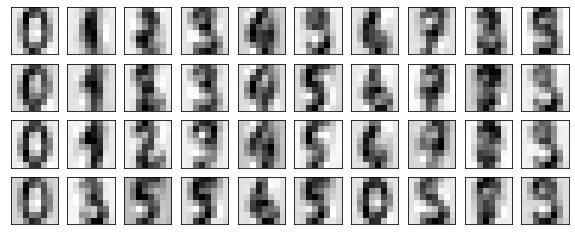

In [59]:
without_noisy = pca.inverse_transform(xdr)
plot_fig(without_noisy)